In [1]:
%reset -f

import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('train.csv', header = 0).set_index('id', drop = False)
test = pd.read_csv('test.csv', header = 0).set_index('id', drop = False)
#train = pd.read_csv('train.csv', header = 0)
#test = pd.read_csv('test.csv', header = 0)

train.timestamp = pd.to_datetime(train.timestamp)
test.timestamp = pd.to_datetime(test.timestamp)
print train.shape, test.shape

(30471, 292) (7662, 291)


In [2]:
df_fixup = pd.read_csv('BAD_ADDRESS_FIX.csv', sep = ';', header = 0).set_index('id', drop = True)

upd_index_train = df_fixup.index[df_fixup.index <= train.index.max()]
upd_index_test = df_fixup.index[df_fixup.index >= test.index.min()]

print upd_index_train.shape, upd_index_test.shape

for col in df_fixup.columns:
    train.loc[upd_index_train, col] = df_fixup.loc[upd_index_train, col]
    test.loc[upd_index_test, col] = df_fixup.loc[upd_index_test, col]

(550L,) (149L,)


In [3]:
ind = train[(train['full_sq'] == 0) | (train['full_sq'] == 1)].index
train.loc[ind, 'full_sq'] = train.loc[ind, 'life_sq']
train.loc[(train['full_sq'] == 0) | (train['full_sq'] == 1), 'full_sq'] = np.NaN

ind = test[(test['full_sq'] == 0) | (test['full_sq'] == 1)].index
test.loc[ind, 'full_sq'] = test.loc[ind, 'life_sq']

train.loc[train.full_sq == 353.0, 'full_sq'] = 35.3
train.loc[train.full_sq == 394.0, 'full_sq'] = 39.4
train.loc[train.full_sq == 412.0, 'full_sq'] = 41.2
train.loc[train.full_sq == 729.0, 'full_sq'] = 72.9
train.loc[train.full_sq == 5326.0, 'full_sq'] = 53.26
train.loc[train.full_sq == 634.0, 'full_sq'] = 63.4
train.loc[train.full_sq == 461.0, 'full_sq'] = 46.1

train.loc[train.full_sq == 325.0, 'full_sq'] = 32.5
train.loc[train.full_sq == 388.0, 'full_sq'] = 38.8
train.loc[train.full_sq == 637.0, 'full_sq'] = 63.7
train.loc[train.full_sq == 603.0, 'full_sq'] = 60.3
train.loc[train.full_sq == 407.0, 'full_sq'] = 40.7

train.loc[train.full_sq <= 10, 'full_sq'] = train.loc[train.full_sq <= 10, 'life_sq']

test.loc[test.full_sq == 403.0, 'full_sq'] = 40.3
test.loc[test.full_sq == 232.7, 'full_sq'] = np.NaN

test.loc[test.full_sq < 10, 'full_sq'] = np.NaN

train.loc[train.id == 20165, 'full_sq'] = 76.0

In [2]:
train.drop(train[(train['full_sq'] == 0) & (train['life_sq'] == 0)].index, inplace = True)
train.drop(train[(train['full_sq'] == 1) & (train['life_sq'] == 1)].index, inplace = True)
## FULL_SQ
# 0 и 1 заменяем на NA
train.loc[train['full_sq'] == 0, 'full_sq'] = np.NaN
train.loc[train['full_sq'] == 1, 'full_sq'] = np.NaN
test.loc[test['full_sq'] == 0, 'full_sq'] = np.NaN
test.loc[test['full_sq'] == 1, 'full_sq'] = np.NaN
#
train.loc[train['full_sq'] == 5326, 'full_sq'] = 53.26
train.loc[train['full_sq'] == 729, 'full_sq'] = 72.9
train.loc[train['full_sq'] == 634, 'full_sq'] = 63.4
train.loc[train['full_sq'] == 637, 'full_sq'] = 63.7
train.loc[train['full_sq'] == 603, 'full_sq'] = 60.3
train.loc[train['full_sq'] == 412, 'full_sq'] = 41.2
train.loc[train['full_sq'] == 461, 'full_sq'] = 46.1
train.loc[train['full_sq'] == 407, 'full_sq'] = 40.7
train.loc[train['full_sq'] == 353, 'full_sq'] = 35.3
train.loc[train['full_sq'] == 394, 'full_sq'] = 39.4
train.loc[train['full_sq'] == 388, 'full_sq'] = 38.8
train.loc[train['full_sq'] == 325, 'full_sq'] = 32.5
train.loc[train['full_sq'] == 9, 'full_sq'] = np.NaN
train.loc[train['full_sq'] == 6, 'full_sq'] = np.NaN
train.loc[train['full_sq'] == 5, 'full_sq'] = np.NaN
test.loc[test['full_sq'] == 2, 'full_sq'] = np.NaN
test.loc[test['full_sq'] == 403, 'full_sq'] = 40.3
#
ind = train[(train['id'] == 17935)].index
train.drop(ind, inplace = True)
#y_train.drop(ind, inplace = True)
##########
## LIFE_SQ
# 0 и 1 заменяем на NA
train.loc[train['life_sq'] == 0, 'life_sq'] = np.NaN
train.loc[train['life_sq'] == 1, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 0, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 1, 'life_sq'] = np.NaN
#
train.loc[train['id'] == 129, 'life_sq'] = 32
train.loc[train['id'] == 1085, 'life_sq'] = 28
train.loc[train['id'] == 1866, 'life_sq'] = 18
train.loc[train['id'] == 4388, 'life_sq'] = 42.6
train.loc[train['id'] == 9240, 'life_sq'] = 30.1
train.loc[train['id'] == 9259, 'life_sq'] = 45.8
train.loc[train['id'] == 13549, 'life_sq'] = 74
train.loc[train['id'] == 13632, 'life_sq'] = 26
train.loc[train['id'] == 13800, 'life_sq'] = 16
train.loc[train['id'] == 26345, 'life_sq'] = 43.5
train.loc[train['id'] == 21083, 'life_sq'] = 34.9
train.loc[train['id'] == 22788, 'life_sq'] = 53
train.loc[train['id'] == 27796, 'life_sq'] = 30
train.loc[train['id'] == 29305, 'life_sq'] = 51
train.loc[train['id'] == 24431, 'life_sq'] = 73
train.loc[train['id'] == 22807, 'life_sq'] = 53
train.loc[train['id'] == 22614, 'life_sq'] = 36
train.loc[train['id'] == 20675, 'life_sq'] = 43
train.loc[train['id'] == 9649, 'life_sq'] = 80
train.loc[train['id'] == 7211, 'life_sq'] = 19.5
train.loc[train['id'] == 6339, 'life_sq'] = 19.1
#
test.loc[test['id'] == 31075, 'life_sq'] = 74.2
test.loc[test['id'] == 32370, 'life_sq'] = 36.1
test.loc[test['id'] == 33265, 'life_sq'] = 86.9
#
train.loc[train['life_sq'] == 163, 'life_sq'] = 16.3
train.loc[train['life_sq'] == 191, 'life_sq'] = 19.1
train.loc[train['life_sq'] == 193, 'life_sq'] = 19.3
train.loc[train['life_sq'] == 195, 'life_sq'] = 19.5
train.loc[train['life_sq'] == 259, 'life_sq'] = 25.9 #full_sq = 45, price_doc = 4900000
train.loc[train['life_sq'] == 281, 'life_sq'] = 28.1 #full_sq = 44, price_doc = 6200000
train.loc[train['life_sq'] == 301, 'life_sq'] = 30.1 #full_sq = 47, price_doc = 5600000
train.loc[train['life_sq'] == 349, 'life_sq'] = 34.9 #full_sq = 52, price_doc = 7200000
train.loc[train['life_sq'] == 426, 'life_sq'] = 42.6 #full_sq = 73, price_doc = 11900000
train.loc[train['life_sq'] == 435, 'life_sq'] = 43.5 #full_sq = 75, price_doc = 12900000
train.loc[train['life_sq'] == 458, 'life_sq'] = 45.8 #full_sq = 77, price_doc = 13700000
train.loc[train['life_sq'] == 7478, 'life_sq'] = 74.78 #full_sq = 79, price_doc = 7700000
train.loc[train['life_sq'] == 637, 'life_sq'] = np.NaN
train.loc[train['life_sq'] == 407, 'life_sq'] = np.NaN
train.loc[train['life_sq'] == 325, 'life_sq'] = np.NaN
train.loc[train['life_sq'] == 802, 'life_sq'] = np.NaN
train.loc[train['life_sq'] == 7, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 2, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 869, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 742, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 361, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 9.8, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 9.2, 'life_sq'] = np.NaN
test.loc[test['life_sq'] == 8.1, 'life_sq'] = np.NaN
#
train.loc[train['full_sq'] < train['life_sq'], 'full_sq'] = train['life_sq']
train.loc[train['full_sq'] == train['life_sq'], 'life_sq'] = np.NaN
test.loc[test['full_sq'] < test['life_sq'], 'full_sq'] = test['life_sq']
test.loc[test['full_sq'] == test['life_sq'], 'life_sq'] = np.NaN
###########
## KITCH_SQ
# 0 и 1 заменяем на NA
train.loc[train['kitch_sq'] == 0, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 1, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 0, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 1, 'kitch_sq'] = np.NaN
#
train.loc[train['kitch_sq'] == train['full_sq'], 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 2013, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 2014, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 1974, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 1970, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 620, 'kitch_sq'] = 6.2
train.loc[train['kitch_sq'] == 97, 'kitch_sq'] = 9.7
train.loc[train['kitch_sq'] == 86, 'kitch_sq'] = 8.6
train.loc[train['kitch_sq'] == 84, 'kitch_sq'] = 8.4
train.loc[train['kitch_sq'] == 73, 'kitch_sq'] = 7.3
train.loc[train['kitch_sq'] == 72, 'kitch_sq'] = 7.2
train.loc[train['kitch_sq'] == 65, 'kitch_sq'] = 6.5
train.loc[train['kitch_sq'] == 61, 'kitch_sq'] = 6.1
train.loc[train['kitch_sq'] == 60, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 44, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 43, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 11160, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 22552, 'kitch_sq'] = np.NaN
train.loc[train['kitch_sq'] == 37, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 29406, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 27752, 'kitch_sq'] = np.NaN
train.loc[train['id'] == 22849, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == test['full_sq'], 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 1968, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 1000, 'kitch_sq'] = np.NaN
test.loc[test['kitch_sq'] == 74, 'kitch_sq'] = 7.4
test.loc[test['kitch_sq'] == 67, 'kitch_sq'] = 6.7
test.loc[test['kitch_sq'] == 53, 'kitch_sq'] = 5.3
test.loc[test['id'] == 31014, 'kitch_sq'] = 13.4
test.loc[test['id'] == 32266, 'kitch_sq'] = 13.4
test.loc[test['id'] == 31301, 'kitch_sq'] = np.NaN
test.loc[test['id'] == 36824, 'kitch_sq'] = np.NaN
#############
## BUILD_YEAR
# 0 и 1 заменяем на NaN
train.loc[train['build_year'] == 0, 'build_year'] = np.NaN
train.loc[train['build_year'] == 1, 'build_year'] = np.NaN
test.loc[test['build_year'] == 0, 'build_year'] = np.NaN
test.loc[test['build_year'] == 1, 'build_year'] = np.NaN
#
train.loc[train['build_year'] == 215, 'build_year'] = 2015
train.loc[train['build_year'] == 71, 'build_year'] = 1971
train.loc[train['build_year'] == 4965, 'build_year'] = 1965
train.loc[train['build_year'] == 20052009, 'build_year'] = 2007
train.loc[train['build_year'] == 1691, 'build_year'] = 1961
test.loc[test['build_year'] == 215, 'build_year'] = 2015
train.loc[train['build_year'] == 3, 'build_year'] = np.NaN
train.loc[train['build_year'] == 20, 'build_year'] = np.NaN
test.loc[test['build_year'] == 2, 'build_year'] = np.NaN
###########
## NUM_ROOM
# 0 заменяем на NaN
train.loc[train['num_room'] == 0, 'num_room'] = np.NaN
test.loc[test['num_room'] == 0, 'num_room'] = np.NaN
#
train.loc[train['num_room'] == 10, 'num_room'] = 1
train.loc[train['num_room'] == 17, 'num_room'] = 1
train.loc[train['num_room'] == 19, 'num_room'] = 1
test.loc[test['num_room'] == 19, 'num_room'] = 1
## PRICE_DOC
##
ind = train[(train['price_doc'] == 111111112)].index
train.drop(ind, inplace = True)
#y_train.drop(ind, inplace = True)
#
#удаляем слишком маленькие значения
#ind_min = train[(train['price_doc'] <= 900000)].index
#train.drop(ind_min, inplace = True)
#y_train.drop(ind_min, inplace = True)
########
## floor - checked
# 0 заменяем на NaN
train.loc[train['floor'] == 0, 'floor'] = np.NaN
test.loc[test['floor'] == 0, 'floor'] = np.NaN
#
train.loc[train['floor'] == 77, 'floor'] = 7
############
## MAX_FLOOR
# 0 заменяем на NaN
train.loc[train['max_floor'] == 0, 'max_floor'] = np.NaN
test.loc[test['max_floor'] == 0, 'max_floor'] = np.NaN
#
train.loc[train['max_floor'] == 117, 'max_floor'] = np.NaN
train.loc[train['max_floor'] == 99, 'max_floor'] = np.NaN
#
var1 = train.loc[train['max_floor'] < train['floor'], ['floor']]
var2 = train.loc[train['max_floor'] < train['floor'], ['max_floor']]
train.loc[train['max_floor'] < train['floor'], ['floor']] = var2
train.loc[train['max_floor'] < train['floor'], ['max_floor']] = var1
#
var3 = test.loc[test['max_floor'] < test['floor'], ['floor']]
var4 = test.loc[test['max_floor'] < test['floor'], ['max_floor']]
test.loc[test['max_floor'] < test['floor'], ['floor']] = var4
test.loc[test['max_floor'] < test['floor'], ['max_floor']] = var3
# оставшиеся 1 заменяем на NaN
train.loc[train['max_floor'] == 1, 'max_floor'] = np.NaN
test.loc[test['max_floor'] == 1, 'max_floor'] = np.NaN

In [4]:
binary_features = ['product_type', 'culture_objects_top_25', 
                    'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 
                    'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 
                    'water_1line', 'big_road1_1line', 'railroad_1line']
#train[binary_features].count()  # все столбцы без NA - по 30471
#test[binary_features].count()   # product_type содержит NA!!!
#for col in binary_features: # во всех столбцах только по 2 значения
#    print 'train', '\n', train[col].value_counts(), '\n'  
#    print 'test', '\n', test[col].value_counts(), '\n'

X_train_binaries = train[binary_features]
X_test_binaries = test[binary_features]
for col in binary_features:
    if col == 'product_type':
        X_train_binaries[col] = X_train_binaries[col].apply(lambda x: 
                                                            1 if x == 'Investment' else (-1 if x == 'OwnerOccupier' else 0))
        X_test_binaries[col] = X_test_binaries[col].apply(lambda x: 
                                                          1 if x == 'Investment' else (-1 if x == 'OwnerOccupier' else 0))
    else:
        X_train_binaries[col] = X_train_binaries[col].apply(lambda x: 1 if x == 'yes' else 0)
        X_test_binaries[col] = X_test_binaries[col].apply(lambda x: 1 if x == 'yes' else 0)

In [5]:
factor_features = ['sub_area', 'ecology', 'material', 'state', 'ID_railroad_station_walk', 
                   'ID_railroad_station_avto', 'ID_big_road1', 'ID_big_road2', 'ID_railroad_terminal', 'ID_bus_terminal',
                  'ID_metro']
X_train_factors = train[factor_features]
X_test_factors = test[factor_features]

#X_train_factors.count()   # NA в material, state, ID_railroad_station_walk
#X_test_factors.count()   # NA в state, ID_railroad_station_walk

# ecology
ecology_states = {'poor': 2, 'no data': 0, 'good': 4, 'excellent': 5, 'satisfactory': 3}
for key, value in ecology_states.items():
    X_train_factors.loc[X_train_factors['ecology'] == key, 'ecology'] = value
    X_test_factors.loc[X_test_factors['ecology'] == key, 'ecology'] = value
X_train_factors.loc[:,'ecology'] = X_train_factors.loc[:,'ecology'].apply(pd.to_numeric)
X_test_factors.loc[:,'ecology'] = X_test_factors.loc[:,'ecology'].apply(pd.to_numeric)

# material: 1 - panel, 2 - brick, 3 - wood, 4 - mass concrete, 5 - breezeblock, 6 - mass concrete plus brick
X_train_factors.loc[X_train_factors['material'].isnull(), 'material'] = 0
X_test_factors.loc[:,'material'] = X_test_factors.loc[:,'material'] + 0.0

# state: 4 for the best, 1 for the worst
X_train_factors.loc[X_train_factors['state'] == 33.0, 'state'] = 3
X_train_factors.loc[X_train_factors['state'].isnull(), 'state'] = 0
X_test_factors.loc[X_test_factors['state'].isnull(), 'state'] = 0

# ID_railroad_station_walk
X_train_factors.loc[X_train_factors['ID_railroad_station_walk'].isnull(), 'ID_railroad_station_walk'] = 0
X_test_factors.loc[X_test_factors['ID_railroad_station_walk'].isnull(), 'ID_railroad_station_walk'] = 0

Column:ID_railroad_station_walk


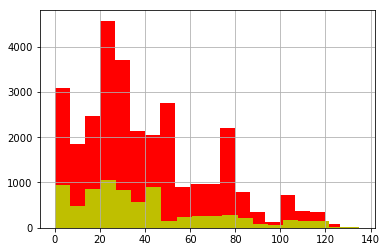

count    30471.000000
mean        39.784648
std         27.801973
min          0.000000
25%         21.000000
50%         33.000000
75%         56.000000
max        133.000000
Name: ID_railroad_station_walk, dtype: float64 

count    7662.000000
mean       38.740929
std        29.737842
min         0.000000
25%        18.000000
50%        31.000000
75%        53.000000
max       135.000000
Name: ID_railroad_station_walk, dtype: float64 

Column:ID_railroad_station_avto


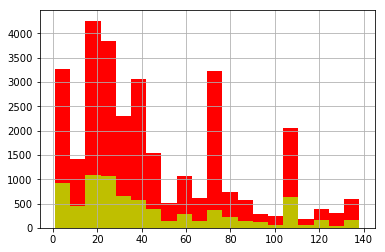

count    30471.000000
mean        46.035411
std         34.600255
min          1.000000
25%         19.000000
50%         38.000000
75%         73.000000
max        138.000000
Name: ID_railroad_station_avto, dtype: float64 

count    7662.000000
mean       44.915688
std        36.126407
min         1.000000
25%        19.000000
50%        33.000000
75%        72.000000
max       138.000000
Name: ID_railroad_station_avto, dtype: float64 

Column:ID_big_road1


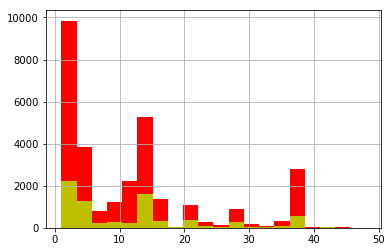

count    30471.000000
mean        11.690394
std         11.402142
min          1.000000
25%          2.000000
50%         10.000000
75%         15.000000
max         48.000000
Name: ID_big_road1, dtype: float64 

count    7662.000000
mean       11.631167
std        10.991243
min         1.000000
25%         2.000000
50%        10.000000
75%        15.000000
max        48.000000
Name: ID_big_road1, dtype: float64 

Column:ID_big_road2


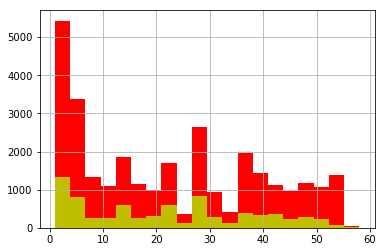

count    30471.000000
mean        22.361885
std         17.513939
min          1.000000
25%          4.000000
50%         20.000000
75%         38.000000
max         58.000000
Name: ID_big_road2, dtype: float64 

count    7662.000000
mean       21.320804
std        15.957421
min         1.000000
25%         5.000000
50%        21.000000
75%        35.000000
max        58.000000
Name: ID_big_road2, dtype: float64 

Column:ID_railroad_terminal


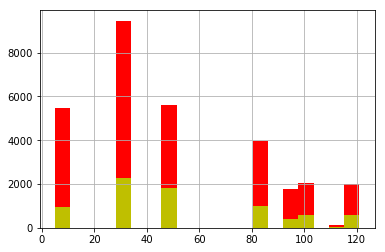

count    30471.000000
mean        51.730990
std         35.418688
min          5.000000
25%         32.000000
50%         50.000000
75%         83.000000
max        121.000000
Name: ID_railroad_terminal, dtype: float64 

count    7662.000000
mean       55.737666
std        34.456321
min         5.000000
25%        32.000000
50%        50.000000
75%        83.000000
max       121.000000
Name: ID_railroad_terminal, dtype: float64 

Column:ID_bus_terminal


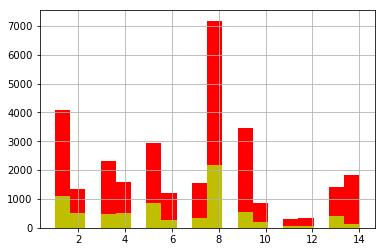

count    30471.000000
mean         6.628762
std          3.731014
min          1.000000
25%          3.000000
50%          8.000000
75%          9.000000
max         14.000000
Name: ID_bus_terminal, dtype: float64 

count    7662.000000
mean        6.146698
std         3.479650
min         1.000000
25%         3.000000
50%         7.000000
75%         8.000000
max        14.000000
Name: ID_bus_terminal, dtype: float64 

Column:ID_metro


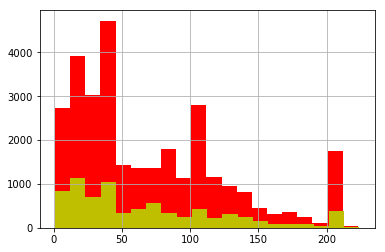

count    30471.000000
mean        71.959437
std         55.269751
min          1.000000
25%         27.000000
50%         51.000000
75%        108.000000
max        223.000000
Name: ID_metro, dtype: float64 

count    7662.000000
mean       69.798747
std        56.076243
min         1.000000
25%        23.000000
50%        50.000000
75%       105.000000
max       224.000000
Name: ID_metro, dtype: float64 



In [5]:
# ID_railroad_station_avto, ID_big_road1, ID_big_road2, ID_railroad_terminal, ID_bus_terminal, ID_metro
for col in factor_features[4:]:
    print 'Column:' + col
    X_train_factors[col].hist(bins = 20, color = 'r')
    X_test_factors[col].hist(bins = 20, color = 'y')
    plt.show()
    print X_train_factors[col].describe(), '\n'
    print X_test_factors[col].describe(), '\n'

In [6]:
# label/count encoding для sub_area
sub_area_cnt = train.sub_area.value_counts()
#train.sub_area.count()
#test.sub_area.value_counts()
#test.sub_area.count()
for i in range(len(sub_area_cnt)):
    X_train_factors.loc[X_train_factors['sub_area'] == sub_area_cnt.index[i], 'sub_area'] = i + 1
    X_test_factors.loc[X_test_factors['sub_area'] == sub_area_cnt.index[i], 'sub_area'] = i + 1
X_train_factors.sub_area = X_train_factors.sub_area.apply(pd.to_numeric)
X_test_factors.sub_area = X_test_factors.sub_area.apply(pd.to_numeric)

In [107]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train.sub_area.values)) 
X_train_factors.sub_area = lbl.transform(list(X_train_factors.sub_area.values))
X_test_factors.sub_area = lbl.transform(list(X_test_factors.sub_area.values))

In [7]:
## average sq.m. price by sub_area + expected price
train['sqm_price'] = train['price_doc']/train['full_sq']
sqm_by_area = pd.DataFrame(train[train.full_sq != 0].groupby(by = 'sub_area', as_index = False)['sqm_price'].median())
train.drop('sqm_price', axis=1, inplace=True)
sqm_by_area.sort_values(by='sqm_price')

train = pd.merge(train, sqm_by_area, how = 'left', on = 'sub_area').set_index('id', drop = False)
test = pd.merge(test, sqm_by_area, how = 'left', on = 'sub_area').set_index('id', drop = False)

train['exp_price'] = train['full_sq']*train['sqm_price']
test['exp_price'] = test['full_sq']*test['sqm_price']
print train.shape, test.shape

(30471, 294) (7662, 293)


In [8]:
train['fake_price'] = 0

exp_price_err = train.exp_price/train.price_doc

train.loc[exp_price_err > 1.8, 'fake_price'] = 1

train.loc[(exp_price_err > 1.3) & (train.price_doc == 2000000) , 'fake_price'] = 1
train.loc[(exp_price_err > 1.3) & (train.price_doc == 3000000) , 'fake_price'] = 1
train.loc[(exp_price_err > 1.3) & (train.price_doc == 5000000) , 'fake_price'] = 1

fake_price_v = train['fake_price']
train.drop('fake_price', axis = 1, inplace = True)
fake_price_v.shape

(30471L,)

In [41]:
# join macro
#macro_cut = pd.read_csv('macro_cut.csv', header = 0)
#macro_cut.timestamp = pd.to_datetime(macro_cut.timestamp)
#macro_cut.head()
#train = pd.merge(train, macro_cut[['timestamp', 'usdrub']], how = 'inner', on = 'timestamp')
#test = pd.merge(test, macro_cut[['timestamp', 'usdrub']], how = 'inner', on = 'timestamp')

In [12]:
## MAGIC_NUMBERS
rate_2015_q2 = 1
rate_2015_q1 = rate_2015_q2 / 0.9932
rate_2014_q4 = rate_2015_q1 / 1.0112
rate_2014_q3 = rate_2014_q4 / 1.0169
rate_2014_q2 = rate_2014_q3 / 1.0086
rate_2014_q1 = rate_2014_q2 / 1.0126
rate_2013_q4 = rate_2014_q1 / 0.9902
rate_2013_q3 = rate_2013_q4 / 1.0041
rate_2013_q2 = rate_2013_q3 / 1.0044
rate_2013_q1 = rate_2013_q2 / 1.0104  # This is 1.002 (relative to mult), close to 1:
rate_2012_q4 = rate_2013_q1 / 0.9832  #     maybe use 2013q1 as a base quarter and get rid of mult?
rate_2012_q3 = rate_2012_q4 / 1.0277
rate_2012_q2 = rate_2012_q3 / 1.0279
rate_2012_q1 = rate_2012_q2 / 1.0279
rate_2011_q4 = rate_2012_q1 / 1.076
rate_2011_q3 = rate_2011_q4 / 1.0236
rate_2011_q2 = rate_2011_q3 / 1
rate_2011_q1 = rate_2011_q2 / 1.011

# train 2015
train['average_q_price'] = 1

train_2015_q2_index = train.loc[train['timestamp'].dt.year == 2015].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2015_q2_index, 'average_q_price'] = rate_2015_q2

train_2015_q1_index = train.loc[train['timestamp'].dt.year == 2015].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2015_q1_index, 'average_q_price'] = rate_2015_q1

# train 2014
train_2014_q4_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2014_q4_index, 'average_q_price'] = rate_2014_q4

train_2014_q3_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2014_q3_index, 'average_q_price'] = rate_2014_q3

train_2014_q2_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2014_q2_index, 'average_q_price'] = rate_2014_q2

train_2014_q1_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2014_q1_index, 'average_q_price'] = rate_2014_q1

# train 2013
train_2013_q4_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2013_q4_index, 'average_q_price'] = rate_2013_q4

train_2013_q3_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2013_q3_index, 'average_q_price'] = rate_2013_q3

train_2013_q2_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2013_q2_index, 'average_q_price'] = rate_2013_q2

train_2013_q1_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2013_q1_index, 'average_q_price'] = rate_2013_q1

# train 2012
train_2012_q4_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2012_q4_index, 'average_q_price'] = rate_2012_q4

train_2012_q3_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2012_q3_index, 'average_q_price'] = rate_2012_q3

train_2012_q2_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2012_q2_index, 'average_q_price'] = rate_2012_q2

train_2012_q1_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2012_q1_index, 'average_q_price'] = rate_2012_q1

# train 2011
train_2011_q4_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2011_q4_index, 'average_q_price'] = rate_2011_q4

train_2011_q3_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2011_q3_index, 'average_q_price'] = rate_2011_q3

train_2011_q2_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2011_q2_index, 'average_q_price'] = rate_2011_q2

train_2011_q1_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2011_q1_index, 'average_q_price'] = rate_2011_q1

train['price_doc'] = train['price_doc'] * train['average_q_price']

#mult = 1.054880504
#train['price_doc'] = train['price_doc'] * mult

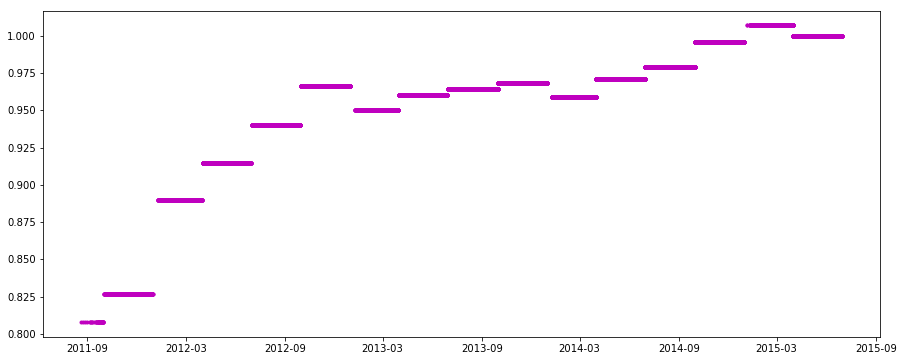

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(train.timestamp, train.average_q_price, 'm.')

In [9]:
# целевая переменная
y_train = train.price_doc

# список числовых переменных
numeric_features = list(set(train.columns.values.tolist()) 
                        - set(binary_features) - set(factor_features) - {'price_doc', 'timestamp', 'id', 'average_q_price'})

# заполняем пропуски нулями
X_train_numeric = train[numeric_features].fillna(0, inplace=False)
X_test_numeric = test[numeric_features].fillna(0, inplace=False)

# заполняем пропуски -999
#X_train_numeric = train[numeric_features].fillna(-999, inplace=False)
#X_test_numeric = test[numeric_features].fillna(-999, inplace=False)

# заполняем пропуски медианами
#train_medians = train[numeric_features].median()
#X_train_numeric = train[numeric_features].fillna(train_medians, inplace=False)
#X_test_numeric = test[numeric_features].fillna(train_medians, inplace=False)

#X_train_numeric_asis = train[numeric_features]
#X_test_numeric_asis = test[numeric_features]

In [66]:
columns_to_del = ['young_male', 'young_female', 'work_male', 'work_female', 'ekder_male', 'ekder_female',
                       '0_6_male', '0_6_female', '7_14_male', '7_14_female', '0_17_male', '0_17_female', '16_29_male',
                       '16_29_female', '0_13_male', '0_13_female', 'male_f', 'female_f', '0_13_all', '0_6_all', '0_17_all',
                       '16_29_all', 'young_all', '7_14_all', 'children_preschool', 'preschool_quota',
                       'preschool_education_centers_raion', 'work_all', 'ekder_all',                            
                       # 'metro_km_walk', 'railroad_station_walk_km', 'metro_km_avto', 'kremlin_km', 'bulvar_ring_km',
                       #'public_transport_station_km', 'ttk_km', 'railroad_station_walk_min', 'zd_vokzaly_avto_km',
                       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_count_500_price_500',
                       'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_count_1000_price_500',
                       'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500',
                       'cafe_count_1000_price_4000', 'cafe_count_1000_na_price',
                       'cafe_count_500_price_1000', 'cafe_count_500_price_1500', 'cafe_count_500_price_2500',
                       'cafe_count_500_price_4000', 'cafe_count_500_na_price', 'cafe_count_1500_price_500',
                       'cafe_count_1500_price_1000', 'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500', 
                       'cafe_count_1500_price_4000', 'cafe_count_1500_na_price', 'cafe_sum_1500_min_price_avg',
                       'cafe_sum_1500_max_price_avg', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000',
                       'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000',
                       'cafe_count_2000_na_price', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 
                       'cafe_count_3000_price_500', 'cafe_count_3000_price_1000',
                       'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000',
                       'cafe_count_3000_na_price', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg',
                       'cafe_count_5000_price_500', 'cafe_count_5000_price_1000',
                       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
                       'cafe_count_5000_na_price', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg',
                 
                       'mosque_count_500', 'mosque_count_1000', 'mosque_count_1500',  # не используются GBR 200 0.1
                       'mosque_count_2000', 'mosque_count_3000','mosque_count_5000'   # не используются GBR 200 0.1
                ]

X_train_numeric_zeros.drop(columns_to_del, axis=1, inplace = True)
X_test_numeric_zeros.drop(columns_to_del, axis=1, inplace = True)

print X_train_numeric_zeros.shape, X_test_numeric_zeros.shape
# (30471, 179) (7662, 179)

(30471, 201) (7662, 201)


In [45]:
# проводим стандартизацию
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_numeric_zeros = scaler.fit_transform(X_train_numeric_zeros)
#X_test_numeric_zeros = scaler.transform(X_test_numeric_zeros)

In [10]:
# склеиваем числовые и бинарные
X_train = pd.concat((X_train_numeric, X_train_binaries, X_train_factors), axis = 1, join = 'inner')
X_test = pd.concat((X_test_numeric, X_test_binaries, X_test_factors), axis = 1, join = 'inner')

print X_train.shape, X_test.shape
print X_train.columns[X_train.count() != len(X_train.index)]
print X_test.columns[X_test.count() != len(X_test.index)]

# (30471, 289) (7662, 289)

(30471, 291) (7662, 291)
Index([], dtype='object')
Index([], dtype='object')


In [11]:
## проводим стандартизацию
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
def rmsle_xgb(preds, dtrain):
    labels = dtrain.get_label()
    return 'rmsle_error', np.sqrt(np.mean((np.log(preds + 1) - np.log(labels + 1))**2))

threshold_date = '2014-10-01'
train_index = X_train[train.timestamp < threshold_date].index
test_index = X_train[train.timestamp >= threshold_date].index

X_cvtrain, X_cvtest = X_train.loc[train_index], X_train.loc[test_index]
y_cvtrain, y_cvtest = y_train[train_index], y_train[test_index]

import xgboost

In [24]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}

dtrain = xgboost.DMatrix(X_cvtrain, y_cvtrain)
dtest = xgboost.DMatrix(X_cvtest, y_cvtest)

bst = xgboost.train(dict(xgb_params, silent=0), dtrain, num_boost_round= 1000, early_stopping_rounds=20,
                      verbose_eval=50, evals = [(dtest, 'eval')], feval = rmsle_xgb)

print bst.best_score, bst.best_iteration

# 0.414998 351
# 0.411464 467 sqm_price + exp_price
# 0.414121 346 label enc sub_area
# 0.412071 411 label enc sub_area sqm_price + exp_price
# 0.41065 421 sqm_price + exp_price + df_fixup
# 0.411552 342 exp_price + df_fixup без sqm_price
# 0.412649 275

[0]	eval-rmse:9.00469e+06	eval-rmsle_error:3.05992
Multiple eval metrics have been passed: 'eval-rmsle_error' will be used for early stopping.

Will train until eval-rmsle_error hasn't improved in 20 rounds.
[50]	eval-rmse:2.30917e+06	eval-rmsle_error:0.254757
[100]	eval-rmse:1.88133e+06	eval-rmsle_error:0.212818
[150]	eval-rmse:1.80945e+06	eval-rmsle_error:0.208711
[200]	eval-rmse:1.77281e+06	eval-rmsle_error:0.207069
[250]	eval-rmse:1.74905e+06	eval-rmsle_error:0.205896
Stopping. Best iteration:
[259]	eval-rmse:1.74516e+06	eval-rmsle_error:0.205678

0.205678 259


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

folds = KFold(n_splits = 5, shuffle=True, random_state=1)   

rf = RandomForestClassifier(n_estimators = 10,
                                random_state=241, 
                                n_jobs = -1)

accu = cross_val_score(estimator = rf,
                                                X = X_train, 
                                                y = fake_price_v, 
                                                cv = folds, # генератор разбиений
                                                scoring = "accuracy", # метрика качества
                                                n_jobs = 1)  # количество ядер процессора (-1 все)
accu.mean()


0.88582594318757302

In [22]:
rf = RandomForestClassifier(n_estimators = 10,
                                random_state=241, 
                                n_jobs = -1)
rf.fit(X_train, fake_price_v)
X_test['fake_price'] = rf.predict(X_test)
X_train['fake_price'] = fake_price_v


In [18]:
from sklearn.cross_validation import train_test_split
X_cvtrain, X_cvtest, y_cvtrain, y_cvtest = train_test_split(X_train, fake_price_v, 
                                                    test_size = 0.3,
                                                    random_state = 1)

import xgboost
xgb = xgboost.XGBClassifier(n_estimators = 1000, silent = False, random_state = 1, learning_rate = 0.05, n_jobs = -1,
                          max_depth = 5, subsample = 0.7, colsample_bytree = 0.7
                          )

xgb.fit(X_cvtrain, y_cvtrain, eval_set=[(X_cvtest, y_cvtest)], early_stopping_rounds=20, verbose=1)

print xgb.best_score, xgb.best_iteration

[0]	validation_0-error:0.10326
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.102713
[2]	validation_0-error:0.102275
[3]	validation_0-error:0.102166
[4]	validation_0-error:0.102275
[5]	validation_0-error:0.101838
[6]	validation_0-error:0.102822
[7]	validation_0-error:0.102932
[8]	validation_0-error:0.103041
[9]	validation_0-error:0.103041
[10]	validation_0-error:0.102822
[11]	validation_0-error:0.103041
[12]	validation_0-error:0.102713
[13]	validation_0-error:0.102822
[14]	validation_0-error:0.102494
[15]	validation_0-error:0.102713
[16]	validation_0-error:0.102822
[17]	validation_0-error:0.103041
[18]	validation_0-error:0.103041
[19]	validation_0-error:0.103041
[20]	validation_0-error:0.103041
[21]	validation_0-error:0.103041
[22]	validation_0-error:0.102822
[23]	validation_0-error:0.102822
[24]	validation_0-error:0.102822
[25]	validation_0-error:0.102822
Stopping. Best iteration:
[5]	validation_0-error:0.101838

0.101838 5


In [25]:
xgb = xgboost.XGBRegressor(n_estimators = 1000, silent = False, random_state = 1, learning_rate = 0.05, n_jobs = -1,
                          max_depth = 5, subsample = 0.7, colsample_bytree = 0.7, objective = 'reg:linear'
                          )

xgb.fit(X_cvtrain, y_cvtrain, eval_set=[(X_cvtest, y_cvtest)], eval_metric=rmsle_xgb, early_stopping_rounds=20, verbose=50)

print xgb.best_score, xgb.best_iteration

# 0.412775 423
# 0.411677 421 sqm_price + exp_price
# 0.411879 482 label enc sub_area
# 0.41258 375 label enc sub_area sqm_price + exp_price
# 0.411822 388 sqm_price + exp_price + df_fixup
# 0.410781 392 exp_price + df_fixup без sqm_price

[0]	validation_0-rmse:9.04993e+06	validation_0-rmsle_error:3.0057
Multiple eval metrics have been passed: 'validation_0-rmsle_error' will be used for early stopping.

Will train until validation_0-rmsle_error hasn't improved in 20 rounds.
[50]	validation_0-rmse:2.28471e+06	validation_0-rmsle_error:0.244807
[100]	validation_0-rmse:1.88788e+06	validation_0-rmsle_error:0.212184
[150]	validation_0-rmse:1.817e+06	validation_0-rmsle_error:0.208359
[200]	validation_0-rmse:1.78767e+06	validation_0-rmsle_error:0.206839
Stopping. Best iteration:
[229]	validation_0-rmse:1.78137e+06	validation_0-rmsle_error:0.206122

0.206122 229


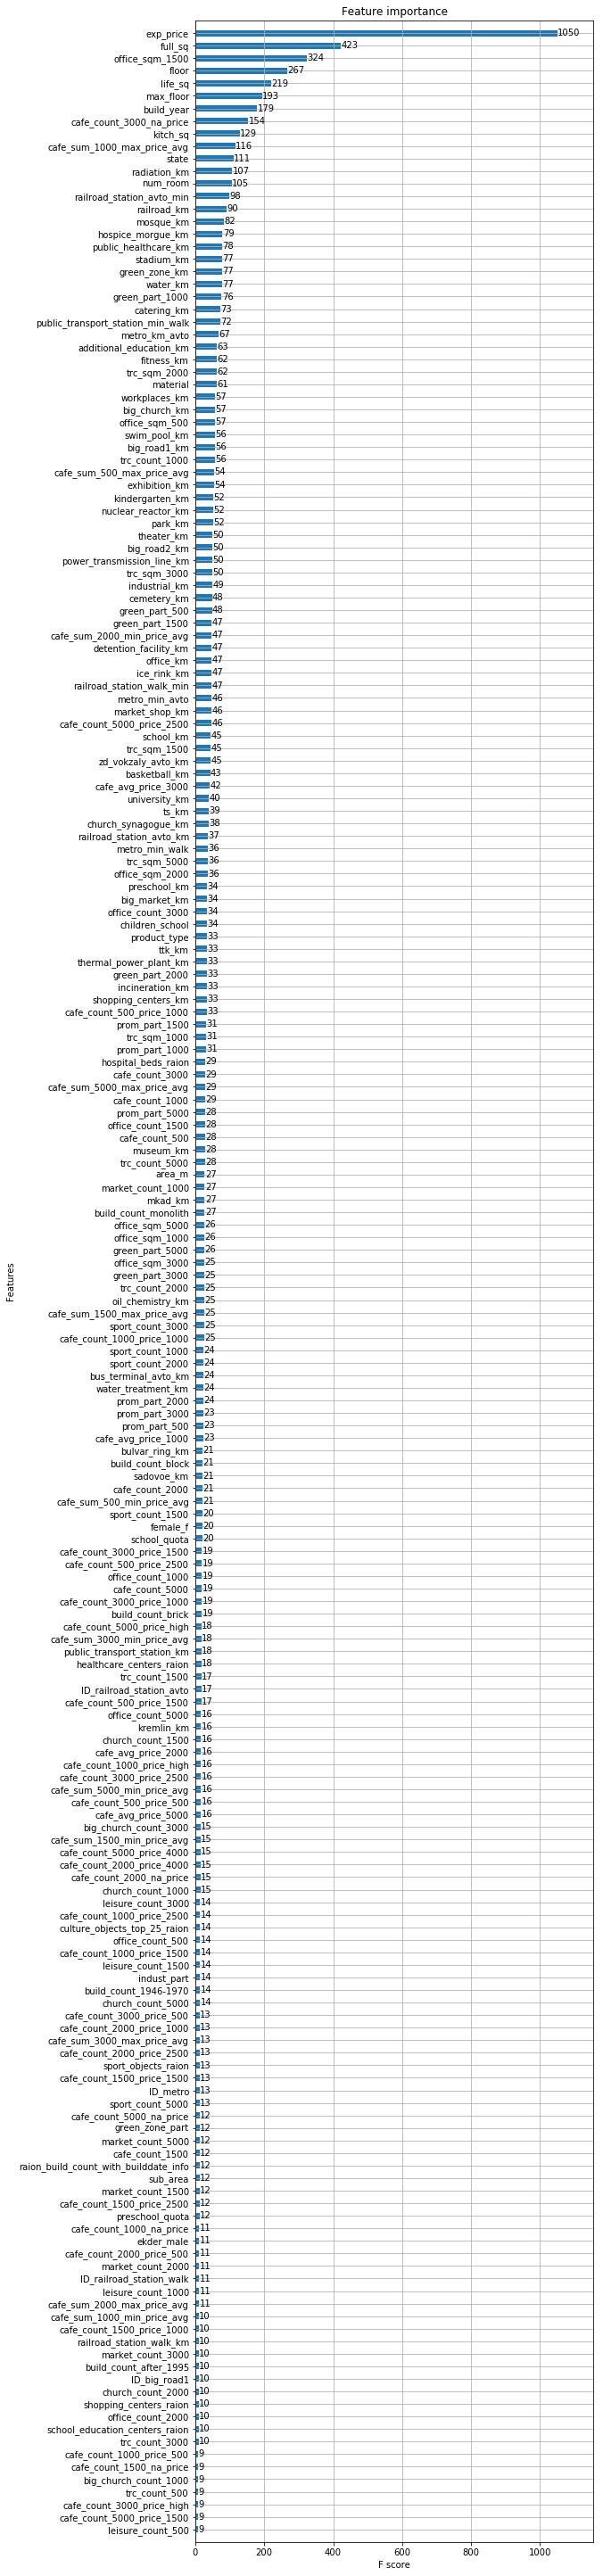

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 52))
xgboost.plot_importance(xgb, max_num_features=200, height=0.5, ax=ax)
plt.show()

In [26]:
xgb = xgboost.XGBRegressor(n_estimators = 229, silent = True, random_state = 1, learning_rate = 0.05, n_jobs = -1,
                          max_depth = 5, subsample = 0.532, colsample_bytree = 0.7, objective = 'reg:linear'
                          )

xgb.fit(X_train, y_train, verbose=50)
xgb_pred = xgb.predict(X_test)

In [90]:
print bst.best_score, bst.best_iteration

dtrain = xgboost.DMatrix(X_train, y_train)
dtest = xgboost.DMatrix(X_test)

model = xgboost.train(dict(xgb_params, silent=0), dtrain, num_boost_round = bst.best_iteration)
xgb_pred = model.predict(dtest)

0.41065 421


In [20]:
# функция для расчёта метрики RMSLE
def rmsle_error(y_true, y_pred):
    y_pred[y_pred < 0] = 0
    return np.sqrt(np.mean((np.log(y_pred + 1) - np.log(y_true + 1))**2))

from sklearn.metrics import make_scorer
rmsle_score = make_scorer(rmsle_error, greater_is_better=True)

In [112]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
import xgboost

folds = KFold(n_splits = 5, shuffle=False, random_state=1)   
rmsle = []

xtr = ExtraTreesRegressor(n_estimators = 100, random_state = 1, n_jobs = -1) 
rf = RandomForestRegressor(n_estimators = 100, random_state = 1, n_jobs = -1)
gbr = GradientBoostingRegressor(n_estimators = 100, verbose = True, random_state = 1, learning_rate = 0.1)

xgb = xgboost.XGBRegressor(n_estimators = 449, silent = False, random_state = 1, learning_rate = 0.05, n_jobs = -1,
                          max_depth = 5, subsample = 0.7, colsample_bytree = 0.7, objective = 'reg:linear',
                          eval_metric = 'rmse')

t0 = datetime.datetime.now()
clf = xgb
for train_index, test_index in folds.split(X_train):
    X_cvtrain, X_cvtest = X_train.loc[train_index], X_train.loc[test_index]
    y_cvtrain, y_cvtest = y_train[train_index], y_train[test_index]
    clf.fit(X_cvtrain, y_cvtrain)
    rmsle = np.hstack((rmsle, rmsle_error(y_cvtest, clf.predict(X_cvtest))))

print rmsle
print rmsle.mean(), rmsle.std(), datetime.datetime.now() - t0

[ 0.59231928  0.43017278  0.47601724  0.449412    0.41064285]
0.471712833003 0.064057612854 0:08:25.956000


In [ ]:
# GBR 100 0.1 zeros full + factors no scaling
# 5 folds, shuffle = False
[ 0.60166339  0.43767511  0.48346565  0.45728618  0.42346763]
0.480711591761 0.0637411684377 0:02:48.244000

# 4 folds, shuffle = False
[ 0.57570792  0.46051948  0.47370754  0.42877629]
0.484677807059 0.0550350643064 0:02:01.792000


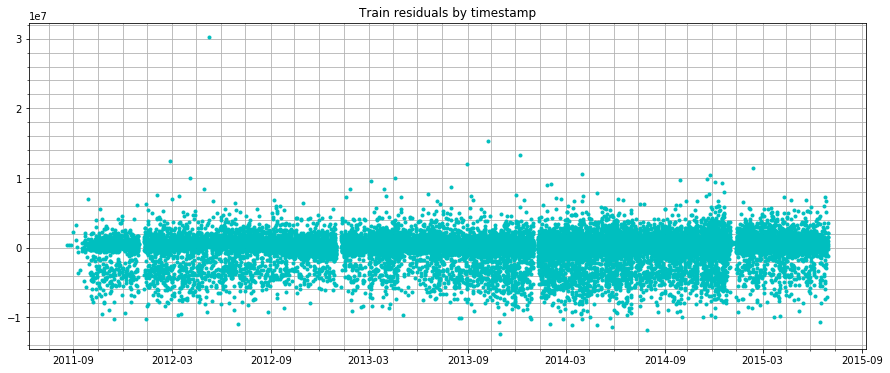

In [13]:
# график residuals от времени
train_residuals = pd.DataFrame({'residual': y_train - xgb.predict(X_train)})
train_residuals['timestamp'] = train['timestamp']
                      
#train_res_mean = train_residuals.groupby(by = 'timestamp', as_index = False)['residual'].mean()

plt.figure(figsize =(15,6))
plt.plot(train_residuals.timestamp, train_residuals.residual, 'c.')    
plt.title('Train residuals by timestamp')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

In [ ]:
# корреляции между столбцами
m = len(X_train_numeric_median.columns)
print m
corr_matrix = np.zeros((m, m))
for i in range(m):
    for j in range(i+1, m):
        corr_matrix[i, j] = X_train_numeric_median.ix[:,[i,j]].corr(method='pearson')

0 0                  office_sqm_1500  office_sqm_1500
office_sqm_1500              1.0              1.0
office_sqm_1500              1.0              1.0
0 1                           office_sqm_1500  cafe_count_3000_na_price
office_sqm_1500                  1.000000                  0.780129
cafe_count_3000_na_price         0.780129                  1.000000
0 2                  office_sqm_1500  trc_count_1000
office_sqm_1500         1.000000        0.552051
trc_count_1000          0.552051        1.000000
0 3                              office_sqm_1500  cafe_sum_1000_max_price_avg
office_sqm_1500                     1.000000                     0.167176
cafe_sum_1000_max_price_avg         0.167176                     1.000000
0 4                  office_sqm_1500  children_school
office_sqm_1500         1.000000         0.034132
children_school         0.034132         1.000000
0 5                            office_sqm_1500  cafe_count_500_price_1000
office_sqm_1500                  

In [27]:
submission = pd.DataFrame(test['id'])
submission['price_doc'] = xgb_pred
submission.to_csv('predictions_xgb_fake_price.csv', header = True, sep=',', index=False)